**<h2 style="text-align: center; color:#FF0000;">EDA & CLUSTERING EQUIPENHANCE BEHAVIOR</h2>**

#### **Neccessary libraries**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from scipy.stats import zscore
from sklearn.manifold import TSNE,Isomap
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
import warnings

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings("ignore")

### **Read & explore data**

In [2]:
df_equip=pd.read_csv("../EDA_transform/data/equipenhance_transform.csv")
df_equip

,vopenid,last_update_time,total_attempts,total_success_wt,equipenhance_lucky,max_consecutive_failures
0,2206111808105074,2025-06-15 14:53:06+00:00,2,2,1.00,0
1,2206111830413361,2025-06-16 06:01:59+00:00,79,51,0.65,5
2,2206112142566650,2025-06-17 03:34:01+00:00,14,11,0.79,1
3,2206131428405180,2025-06-13 03:56:37+00:00,1,1,1.00,0
4,2206141543270674,2025-06-10 14:35:30+00:00,2,0,0.00,2
...,...,...,...,...,...,...
55133,6220001341173,2025-06-08 06:12:13+00:00,4,3,0.75,1
55134,6220001406323,2025-06-17 14:14:40+00:00,5,2,0.40,2
55135,6220001449993,2025-06-13 07:30:53+00:00,4,3,0.75,1
55136,chungminhde,2025-06-18 11:14:52+00:00,16,11,0.69,2


In [3]:
df_equip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55138 entries, 0 to 55137
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   vopenid                   55138 non-null  object 
 1   last_update_time          55138 non-null  object 
 2   total_attempts            55138 non-null  int64  
 3   total_success_wt          55138 non-null  int64  
 4   equipenhance_lucky        55138 non-null  float64
 5   max_consecutive_failures  55138 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 2.5+ MB


In [4]:
df_equip.describe()

,total_attempts,total_success_wt,equipenhance_lucky,max_consecutive_failures
count,55138.00,55138.00,55138.00,55138.00
mean,123.71,83.44,0.72,2.84
std,246.97,152.14,0.20,2.64
min,1.00,0.00,0.00,0.00
25%,8.00,6.00,0.61,1.00
50%,32.00,22.00,0.71,2.00
75%,138.00,94.00,0.85,4.00
max,12899.00,5587.00,1.00,30.00


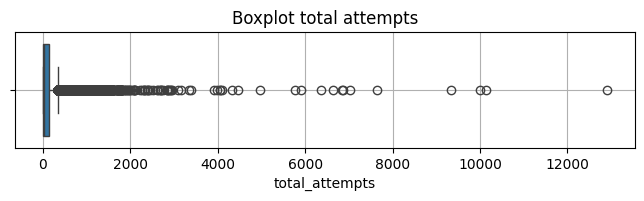

In [5]:
plt.figure(figsize=(8,1.5))
sns.boxplot(x=df_equip['total_attempts'].dropna())
plt.title('Boxplot total attempts')
plt.grid(True)
plt.show()

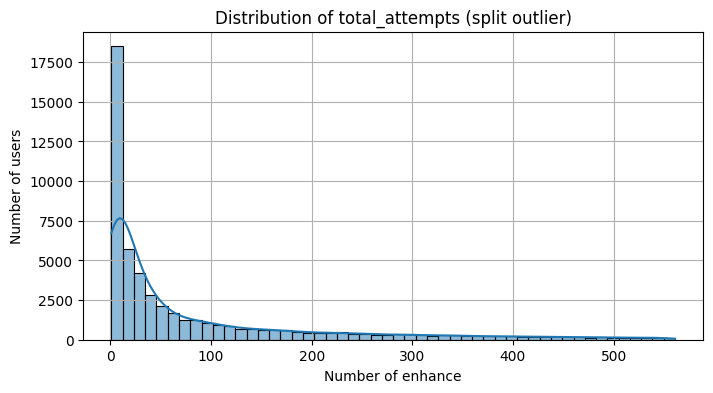

In [6]:
threshold = df_equip['total_attempts'].quantile(0.95)
filtered = df_equip[df_equip['total_attempts'] <= threshold]

plt.figure(figsize=(8,4))
sns.histplot(filtered['total_attempts'], bins=50, kde=True)
plt.title('Distribution of total_attempts (split outlier)')
plt.xlabel('Number of enhance')
plt.ylabel('Number of users')
plt.grid(True)
plt.show()

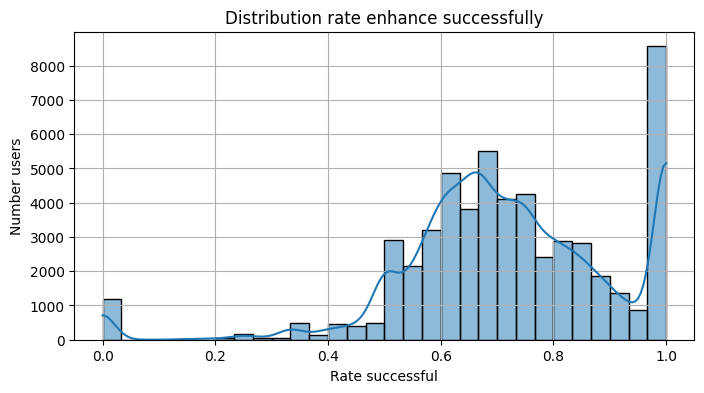

In [7]:
plt.figure(figsize=(8,4))
sns.histplot(df_equip['equipenhance_lucky'].dropna(), bins=30, kde=True)
plt.title('Distribution rate enhance successfully')
plt.xlabel('Rate successful')
plt.ylabel('Number users')
plt.grid(True)
plt.show()

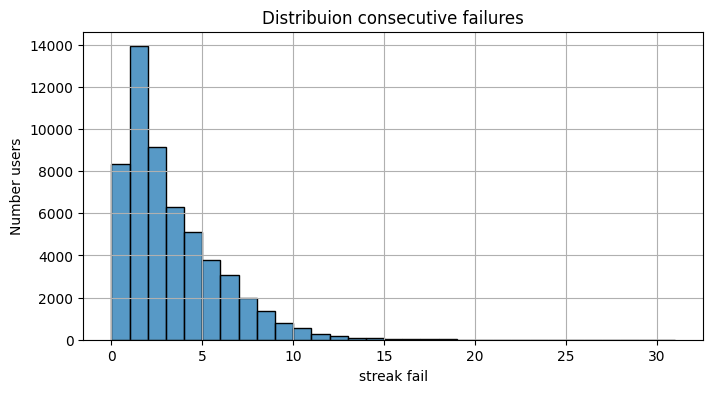

In [8]:
plt.figure(figsize=(8,4))
sns.histplot(df_equip['max_consecutive_failures'].dropna(), bins=range(0, df_equip['max_consecutive_failures'].max()+2), kde=False)
plt.title('Distribuion consecutive failures')
plt.xlabel('streak fail')
plt.ylabel('Number users')
plt.grid(True)
plt.show()


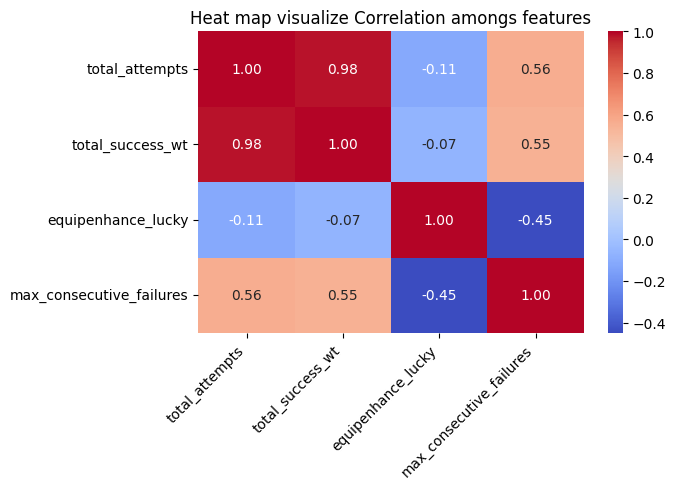

In [9]:
corr_cols = df_equip.drop(columns=['vopenid','last_update_time']).columns

plt.figure(figsize=(7,5))
sns.heatmap(df_equip[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45, ha='right')
plt.title('Heat map visualize Correlation amongs features')
plt.tight_layout()
plt.show()

In [12]:
print("Skewness:")
print(df_equip[corr_cols].skew().sort_values(ascending=False))

print("\nKurtosis:")
print(df_equip[corr_cols].kurtosis().sort_values(ascending=False))

Skewness:
total_attempts             11.41
total_success_wt            6.82
max_consecutive_failures    1.44
equipenhance_lucky         -0.88
dtype: float64

Kurtosis:
total_attempts             355.39
total_success_wt           133.80
max_consecutive_failures     2.88
equipenhance_lucky           2.22
dtype: float64


### **Prepare data and modeling**

In [ ]:
from sklearn.preprocessing import RobustScaler

X = df_equip.drop(columns=['vopenid', 'last_update_time'], axis=1)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

#### **Kmeans**

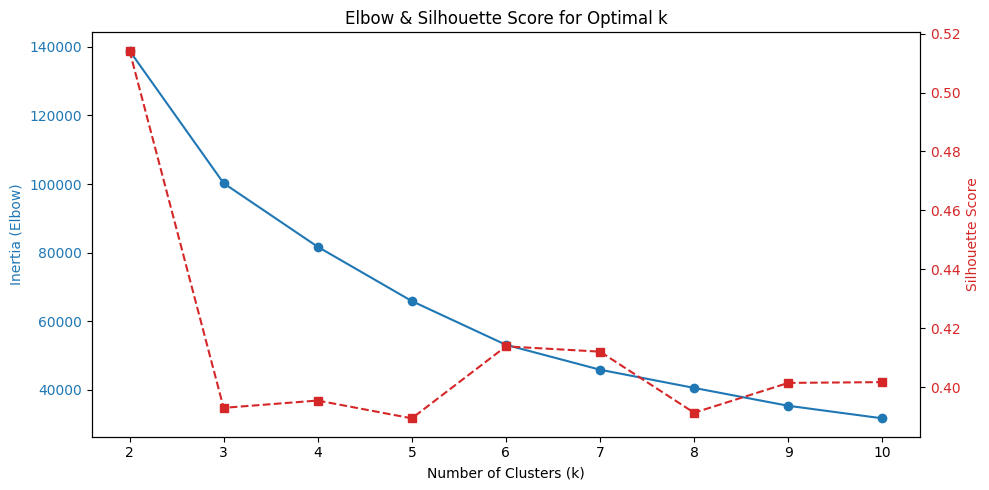

In [ ]:
# inertia = []
# silhouette = []
# K_range = range(2, 11)  # Number clusters

# for k in K_range:
#     kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
#     labels = kmeans.fit_predict(X_scaled)
    
#     inertia.append(kmeans.inertia_)
#     silhouette.append(silhouette_score(X_scaled, labels))


# fig, ax1 = plt.subplots(figsize=(10, 5))
# color = 'tab:blue'
# ax1.set_xlabel('Number of Clusters (k)')
# ax1.set_ylabel('Inertia (Elbow)', color=color)
# ax1.plot(K_range, inertia, marker='o', color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()
# color = 'tab:red'
# ax2.set_ylabel('Silhouette Score', color=color)
# ax2.plot(K_range, silhouette, marker='s', linestyle='--', color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# plt.title('Elbow & Silhouette Score for Optimal k')
# plt.tight_layout()
# plt.show()

In [18]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [19]:
df_equip['kmeans_cluster'] = kmeans_labels 

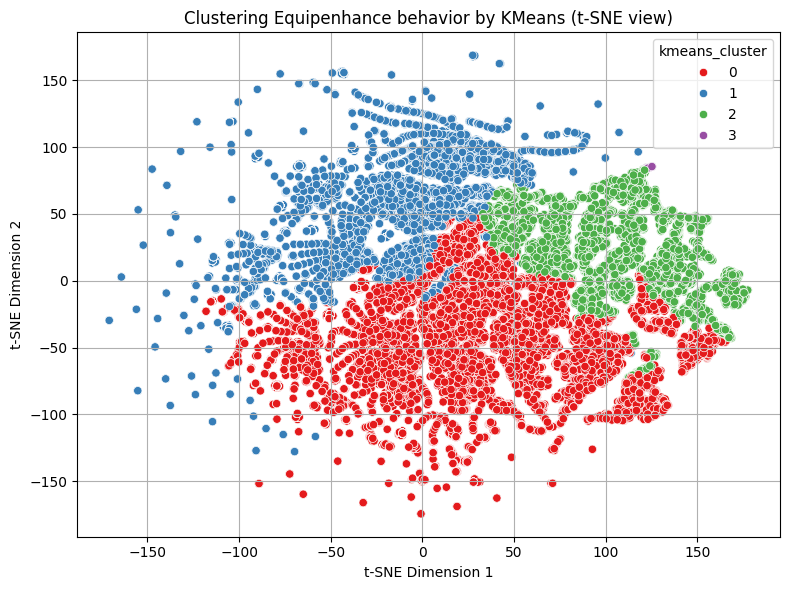

In [20]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
tsne_result = tsne.fit_transform(X_scaled)

df_equip['tsne_1'] = tsne_result[:, 0]
df_equip['tsne_2'] = tsne_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_equip,
    x='tsne_1', y='tsne_2',
    hue='kmeans_cluster', palette='Set1'
)
plt.title(f'Clustering Equipenhance behavior by KMeans (t-SNE view)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.tight_layout()
plt.show()

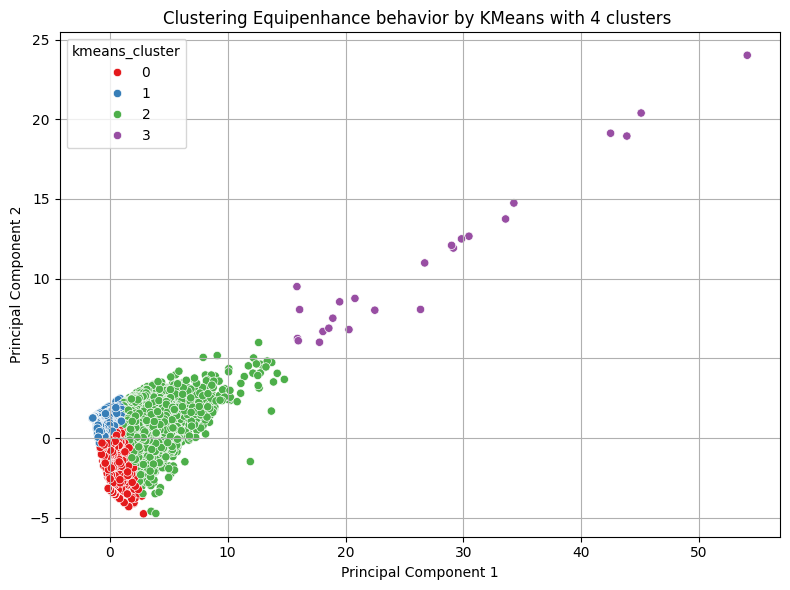

In [22]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df_equip['pca_kmean_1'] = pca_result[:, 0]
df_equip['pca_kmean_2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_equip,
    x='pca_kmean_1', y='pca_kmean_2',
    hue='kmeans_cluster', palette='Set1'
)
plt.title(f'Clustering Equipenhance behavior by KMeans with 4 clusters ')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
cluster_stats = df_equip.groupby('kmeans_cluster')[
    [
      'total_attempts','total_success_wt','equipenhance_lucky','max_consecutive_failures',
    ]   
].mean().round(2)

cluster_counts = df_equip['kmeans_cluster'].value_counts().sort_index().rename('num_users')
total_users = cluster_counts.sum()
cluster_summary = cluster_stats.join(cluster_counts)
cluster_summary['percent_users'] = (cluster_summary['num_users'] / total_users * 100).round(2)
cluster_summary = cluster_summary.sort_values(by='equipenhance_lucky', ascending=False)
cluster_summary

,total_attempts,total_success_wt,equipenhance_lucky,max_consecutive_failures,num_users,percent_users
kmeans_cluster,,,,,,
1,34.31,29.25,0.87,0.94,25424,46.11
2,557.04,367.79,0.67,6.88,7218,13.09
0,79.47,50.28,0.57,3.67,22472,40.76
3,5914.38,3021.04,0.53,10.58,24,0.04


#### **Metrics and evaluating**

In [26]:
ch_kmeans = calinski_harabasz_score(X_scaled, df_equip['kmeans_cluster'])
print(f"KMeans Calinski–Harabasz Index: {ch_kmeans:.4f}")

KMeans Calinski–Harabasz Index: 31226.7690


In [27]:
ch_kmeans = davies_bouldin_score(X_scaled, df_equip['kmeans_cluster'])
print(f"KMeans Davies-Bouldin score: {ch_kmeans:.4f}")

KMeans Davies-Bouldin score: 0.7911


In [28]:
sil_kmeans = silhouette_score(X_scaled, df_equip['kmeans_cluster'])
print(f"KMeans Silhouette score: {sil_kmeans:.4f}")

KMeans Silhouette score: 0.3954


In [29]:
df_equip['equi_beha'] = df_equip['kmeans_cluster']
mapping = {
    0: 'a',
    1: 'b',
    2: 'c',
    3: 'd'
}
df_equip['equi_beha'] = df_equip['kmeans_cluster'].map(mapping)

In [30]:
df_equip.drop(columns=['tsne_1','tsne_2','pca_kmean_1','pca_kmean_2','kmeans_cluster'],axis=1,inplace=True)

In [31]:
df_equip.to_csv("../EDA_transform/data/equipenhance_transform_cluster.csv",index=False,header=True)